In [36]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
# Series de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

## 1. Gestión de Datos y Análisis
#### complemento SQL

### Continuación EDA

In [37]:
df = pd.read_csv(r'assetment-bookmaker (3).csv', sep=';', encoding='latin-1')
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Periodo                      447 non-null    object 
 1   # Clicks                     269 non-null    float64
 2   # Registros IN               424 non-null    float64
 3   # Primer depósito IN         424 non-null    float64
 4   Total depositado IN          404 non-null    float64
 5   # Personas que apostaron IN  404 non-null    float64
 6   Total apostado               404 non-null    float64
 7   Net revenue IN               404 non-null    float64
dtypes: float64(7), object(1)
memory usage: 28.1+ KB
None


,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
count,269.000000,424.000000,424.000000,404.000000,404.000000,404.000000,404.000000
mean,1332.037175,24.716981,13.926887,4264.528107,277.868812,33410.939322,924.937067
std,2180.594419,100.916955,48.932934,4259.580876,324.975136,41727.585068,3384.336651
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.206802,-19141.062750
25%,3.000000,0.000000,0.000000,881.910946,114.750000,4434.178872,-4.609303
50%,283.000000,0.000000,1.000000,2736.441716,178.000000,16856.000015,159.635620
75%,2222.000000,4.000000,5.000000,7317.723530,220.500000,47524.790748,1765.929862
max,18707.000000,1324.000000,659.000000,23800.789950,1427.000000,289945.271300,25210.346660


In [38]:
df.sample(50)

,Periodo,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
284,2023-06-12,2.0,0.0,0.0,4190.530043,122.0,31680.945940,1866.706923
121,2023-02-10,NaN,0.0,0.0,0.000000,1.0,10.085095,3.182361
242,2023-05-15,NaN,0.0,0.0,20.307290,1.0,84.153410,0.017606
413,2023-09-07,NaN,1.0,2.0,10840.745070,674.0,67026.063880,3084.492249
37,2022-12-07,2789.0,3.0,10.0,1529.178199,166.0,16173.022240,616.097778
155,2023-03-05,1293.0,1.0,3.0,2515.325293,217.0,11816.529010,1636.627650
330,2023-07-17,1.0,0.0,0.0,NaN,NaN,NaN,NaN
57,2022-12-25,2592.0,13.0,8.0,987.222910,118.0,5809.006868,384.058459
63,2022-12-31,3136.0,12.0,4.0,1532.639874,185.0,16827.724880,55.443228
258,2023-05-24,NaN,0.0,0.0,0.000000,1.0,15.117919,15.117919


### Limpieza y transformación de datos con Python

In [39]:
# Cración de funciones para tratamiento de datos.

# Identificación de outliers.
def outlier(value, columna, metodo):
    outlier = 0
    # IQR
    if metodo == 1:
        q1 = np.percentile(df[columna].dropna(), 25)
        q3 = np.percentile(df[columna].dropna(), 75)
        iqr = q3 - q1
        if value > q3 + 1.5 * iqr:
            outlier = 1
        elif value < q1 - 1.5 * iqr:
            outlier = 1
        else: outlier = 0
    # 3 sigma
    else:
        std = df[columna].dropna().std()
        avg = df[columna].dropna().mean()
        if value > avg + 3 * std:
            outlier = 1
        elif value < avg - 3 * std:
            outlier = 1
        else: outlier = 0
        
    return outlier

# Media de una variable según el año.
def mean_year(df, column, year):
    return round(df[df['Year'].dropna() == year][column].mean())
# Media de una variable según el año y mes.
def mean_month_year(df, column, year, month):
    return round(df[(df['Year'].dropna() == year) & (df['Month'].dropna() == month)][column].mean())

In [40]:
# Ingenieria de datos.
df['Periodo'] = pd.to_datetime(df['Periodo'])
df['Year'] = df['Periodo'].apply(lambda x:pd.to_datetime(x).year)
df['Month'] = df['Periodo'].apply(lambda x:pd.to_datetime(x).month)
df['Day'] = df['Periodo'].apply(lambda x:pd.to_datetime(x).day)
df['# Registros IN'] = df['# Registros IN'].apply(lambda x: int(x) if np.isnan(x) != True else x)

# Dado que el 40 % de los datos de la columna clicks son nulos la columna es eliminada.
df = df.drop(columns = ['# Clicks'])

# Se borran los primeros registros ya que no tienen continuidad temporal con relación a los otros datos.
df = df.iloc[3:]
df.reset_index(drop=True, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Periodo                      444 non-null    datetime64[ns]
 1   # Registros IN               424 non-null    float64       
 2   # Primer depósito IN         424 non-null    float64       
 3   Total depositado IN          404 non-null    float64       
 4   # Personas que apostaron IN  404 non-null    float64       
 5   Total apostado               404 non-null    float64       
 6   Net revenue IN               404 non-null    float64       
 7   Year                         444 non-null    int64         
 8   Month                        444 non-null    int64         
 9   Day                          444 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 34.8 KB


In [42]:
df

,Periodo,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN,Year,Month,Day
0,2022-11-03,0.0,0.0,194.524900,1.0,194.524900,160.483043,2022,11,3
1,2022-11-04,0.0,0.0,0.000000,1.0,44.174122,6.675201,2022,11,4
2,2022-11-05,0.0,0.0,0.000000,1.0,27.940599,-38.264751,2022,11,5
3,2022-11-06,0.0,0.0,0.000000,1.0,66.087881,66.087881,2022,11,6
4,2022-11-08,0.0,0.0,97.724580,1.0,368.705058,78.179664,2022,11,8
...,...,...,...,...,...,...,...,...,...,...
439,2023-09-22,0.0,0.0,20.337191,1.0,60.688212,16.547864,2023,9,22
440,2023-09-23,1.0,5.0,10010.929370,774.0,74746.940720,3160.019438,2023,9,23
441,2023-09-23,0.0,0.0,0.000000,1.0,17.277301,6.835713,2023,9,23
442,2023-09-24,2.0,8.0,9435.159241,891.0,62595.900800,1938.007500,2023,9,24


#### Dependiendo de la columna se trataron los valores nulos de manera diferente, esto se realizó con base en la distribución de los datos y su estadistica descriptiva.

**# Registros IN:** Menos del 10 % de valores faltantes distribuidos de manera aleatoria. No  hay correlación positiva o negativa con el periodo de tiempo. Imputación promedio de valores sin outliers.

**# Primer depósito IN:** Menos del 10 % de valores faltantes distribuidos de manera aleatoria. No  hay correlación positiva o negativa con el periodo de tiempo. Imputación promedio de valores sin outliers.

**Total depositado IN:** Menos del 15 % de valores faltantes distribuidos de manera aleatoria. Hay una correlación suave positiva con el periodo de tiempo. Imputación promedio de valores sin outliers acorde con el año.

**# Personas que apostaron IN:** Menos del 15 % de valores faltantes distribuidos de manera aleatoria. La distribución de los datos con relación al periodo permite evidenciar 2 picos, con un incremento en el número de personas que apostaron en el 12-2022 y del 07-2023 al 10-2023. Imputación promedio de valores sin outliers acorde con el año y mes.

**Total apostado:** Menos del 15 % de valores faltantes distribuidos de manera aleatoria. Hay un incremento con el tiempo pero no es de manera constante. Imputación promedio de valores sin outliers acorde con el año.

**Net revenue IN:** Menos del 15 % de valores faltantes distribuidos de manera aleatoria. Los datos tienen una dristribución normal por lo cual se usará para los outliers 3 sigma. Imputación promedio de valores sin outliers.

(array([  2.,   1.,   7.,  30., 294.,  57.,  11.,   0.,   1.,   1.]),
 array([-19141.06275 , -14705.921809, -10270.780868,  -5835.639927,
         -1400.498986,   3034.641955,   7469.782896,  11904.923837,
         16340.064778,  20775.205719,  25210.34666 ]),
 <BarContainer object of 10 artists>)

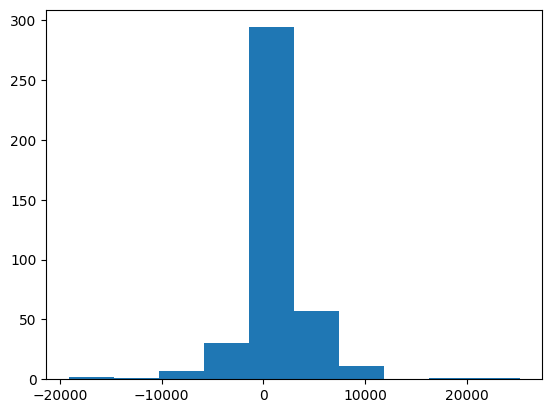

In [43]:
# Histograma para las diferentes columnas
plt.hist(df['Net revenue IN'].dropna())


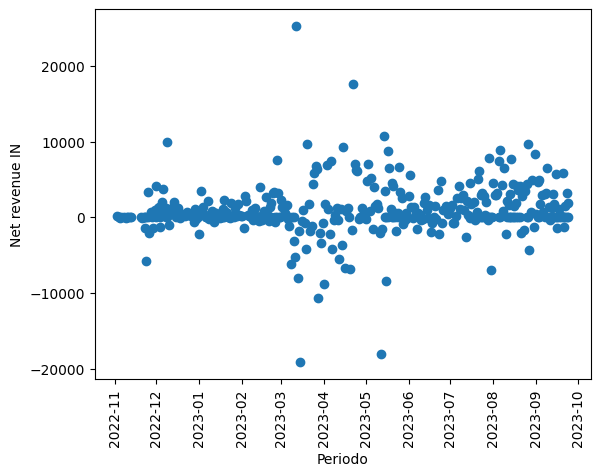

In [44]:
# Variable a través del tiempo.
plt.scatter(df['Periodo'], df['Net revenue IN'])
plt.xlabel('Periodo')
plt.ylabel('Net revenue IN')
plt.xticks( rotation = 90)
plt.show()

In [45]:
# Registros IN:
# Definición de outliers.
out_no_reg_in = df['# Registros IN'].dropna().apply(lambda x: outlier(x, '# Registros IN', 1))
# Datos sin valores nulos y con definición de outliers.
df_no_reg_in = pd.concat([df['# Registros IN'].dropna(), out_no_reg_in.rename('outlier')], names=['a','b'], axis =1)
# Media de los datos sin outlier e imputación a valores nulos.
df['# Registros IN'] = df['# Registros IN'].fillna(round(df_no_reg_in[df_no_reg_in['outlier'] == 0]['# Registros IN'].mean()))

In [46]:
# Primer depósito IN:
# Definición de outliers.
out_no_1re_dep_in = df['# Primer depósito IN'].dropna().apply(lambda x: outlier(x, '# Primer depósito IN', 1))
# Datos sin valores nulos y con definición de outliers.
df_no_1re_dep_in = pd.concat([df['# Primer depósito IN'].dropna(), out_no_1re_dep_in.rename('outlier')], axis =1)
# Media de los datos sin outlier e imputación a valores nulos.
df['# Primer depósito IN'] = df['# Primer depósito IN'].fillna(round(df_no_1re_dep_in[df_no_1re_dep_in['outlier'] == 0]['# Primer depósito IN'].mean()))

In [47]:
# Total depositado IN:
# Definición de outliers.
out_total_dep_in = df['Total depositado IN'].dropna().apply(lambda x: outlier(x, 'Total depositado IN', 1))
# Datos sin valores nulos y con definición de outliers.
df_out_total_dep_in = pd.concat([df['Total depositado IN'].dropna(), out_total_dep_in.rename('outlier'), df[['# Personas que apostaron IN','Year']].dropna()['Year']], axis =1)
# Media de los datos sin outlier e imputación a valores nulos acorde con el año.
df['Total depositado IN'] = df.apply(lambda x: mean_year(df_out_total_dep_in,'Total depositado IN', x['Year']) if np.isnan(x['Total depositado IN']) == True else x['Total depositado IN'], axis = 1)

In [48]:
# # Personas que apostaron IN:
# Definición de outliers.
out_per_apos_in = df['# Personas que apostaron IN'].dropna().apply(lambda x: outlier(x, '# Personas que apostaron IN', 1))
# Datos sin valores nulos y con definición de outliers.
df_out_per_apos_inn = pd.concat([df['# Personas que apostaron IN'].dropna(), out_per_apos_in.rename('outlier'),df[['# Personas que apostaron IN','Year']].dropna()['Year'], df[['# Personas que apostaron IN','Month']].dropna()['Month']], axis =1)
# Media de los datos sin outlier e imputación a valores nulos acorde con el año.
df['# Personas que apostaron IN'] = df.apply(lambda x: mean_month_year(df_out_per_apos_inn, '# Personas que apostaron IN', x['Year'], x['Month']) if np.isnan(x['# Personas que apostaron IN']) == True else x['# Personas que apostaron IN'], axis = 1)

In [49]:
# Total apostado:
# Definición de outliers.
out_total_apostado = df['Total apostado'].dropna().apply(lambda x: outlier(x, 'Total apostado', 1))
# Datos sin valores nulos y con definición de outliers.
df_out_total_apostado = pd.concat([df['Total apostado'].dropna(), out_total_apostado.rename('outlier'), df[['Total apostado','Year']].dropna()['Year']], axis =1)
# Media de los datos sin outlier e imputación a valores nulos acorde con el año.
df['Total apostado'] = df.apply(lambda x: mean_year(df_out_total_apostado,'Total apostado', x['Year']) if np.isnan(x['Total apostado']) == True else x['Total apostado'], axis = 1)

In [50]:
# Net revenue IN:
out_net_revenue_in = df['Net revenue IN'].dropna().apply(lambda x: outlier(x, 'Net revenue IN', 1))
# Datos sin valores nulos y con definición de outliers.
df_out_net_revenue_in = pd.concat([df['Net revenue IN'].dropna(), out_net_revenue_in.rename('outlier')], names=['a','b'], axis =1)
# Media de los datos sin outlier e imputación a valores nulos.
df['Net revenue IN'] = df['Net revenue IN'].fillna(round(df_out_net_revenue_in[df_out_net_revenue_in['outlier'] == 0]['Net revenue IN'].mean()))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Periodo                      444 non-null    datetime64[ns]
 1   # Registros IN               444 non-null    float64       
 2   # Primer depósito IN         444 non-null    float64       
 3   Total depositado IN          444 non-null    float64       
 4   # Personas que apostaron IN  444 non-null    float64       
 5   Total apostado               444 non-null    float64       
 6   Net revenue IN               444 non-null    float64       
 7   Year                         444 non-null    int64         
 8   Month                        444 non-null    int64         
 9   Day                          444 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 34.8 KB


In [52]:
df.columns

Index(['Periodo', '# Registros IN', '# Primer depósito IN',
       'Total depositado IN', '# Personas que apostaron IN', 'Total apostado',
       'Net revenue IN', 'Year', 'Month', 'Day'],
      dtype='object')

In [53]:
# Renombrar columnas
df = df.rename(columns = {'# Registros IN':'no_registros', '# Primer depósito IN':'no_1er_deposito',
       'Total depositado IN':'total_depositado', '# Personas que apostaron IN':'no_pers_apostaron', 'Total apostado':'total_apostado',
       'Net revenue IN':'net_revenue'})

In [57]:
df = df.drop_duplicates('Periodo')
df = df.reset_index(drop=True)

## 2. Proyección de Ingresos Netos

In [58]:
df

,Periodo,no_registros,no_1er_deposito,total_depositado,no_pers_apostaron,total_apostado,net_revenue,Year,Month,Day
0,2022-11-03,0.0,0.0,194.524900,1.0,194.524900,160.483043,2022,11,3
1,2022-11-04,0.0,0.0,0.000000,1.0,44.174122,6.675201,2022,11,4
2,2022-11-05,0.0,0.0,0.000000,1.0,27.940599,-38.264751,2022,11,5
3,2022-11-06,0.0,0.0,0.000000,1.0,66.087881,66.087881,2022,11,6
4,2022-11-08,0.0,0.0,97.724580,1.0,368.705058,78.179664,2022,11,8
...,...,...,...,...,...,...,...,...,...,...
315,2023-09-20,3.0,6.0,9911.344357,795.0,100493.092800,5872.001080,2023,9,20
316,2023-09-21,2.0,8.0,10699.705740,779.0,55891.299730,-1315.828239,2023,9,21
317,2023-09-22,1.0,4.0,8284.690318,743.0,63848.832490,1503.354627,2023,9,22
318,2023-09-23,1.0,5.0,10010.929370,774.0,74746.940720,3160.019438,2023,9,23


In [59]:
print('Fechas:')
print('min:', df['Periodo'].min())
print('max:', df['Periodo'].max())
print('Temporal Window:')
print(df['Periodo'].max() - df['Periodo'].min())

Fechas:
min: 2022-11-03 00:00:00
max: 2023-09-24 00:00:00
Temporal Window:
325 days 00:00:00


(-10000.0, 10000.0)

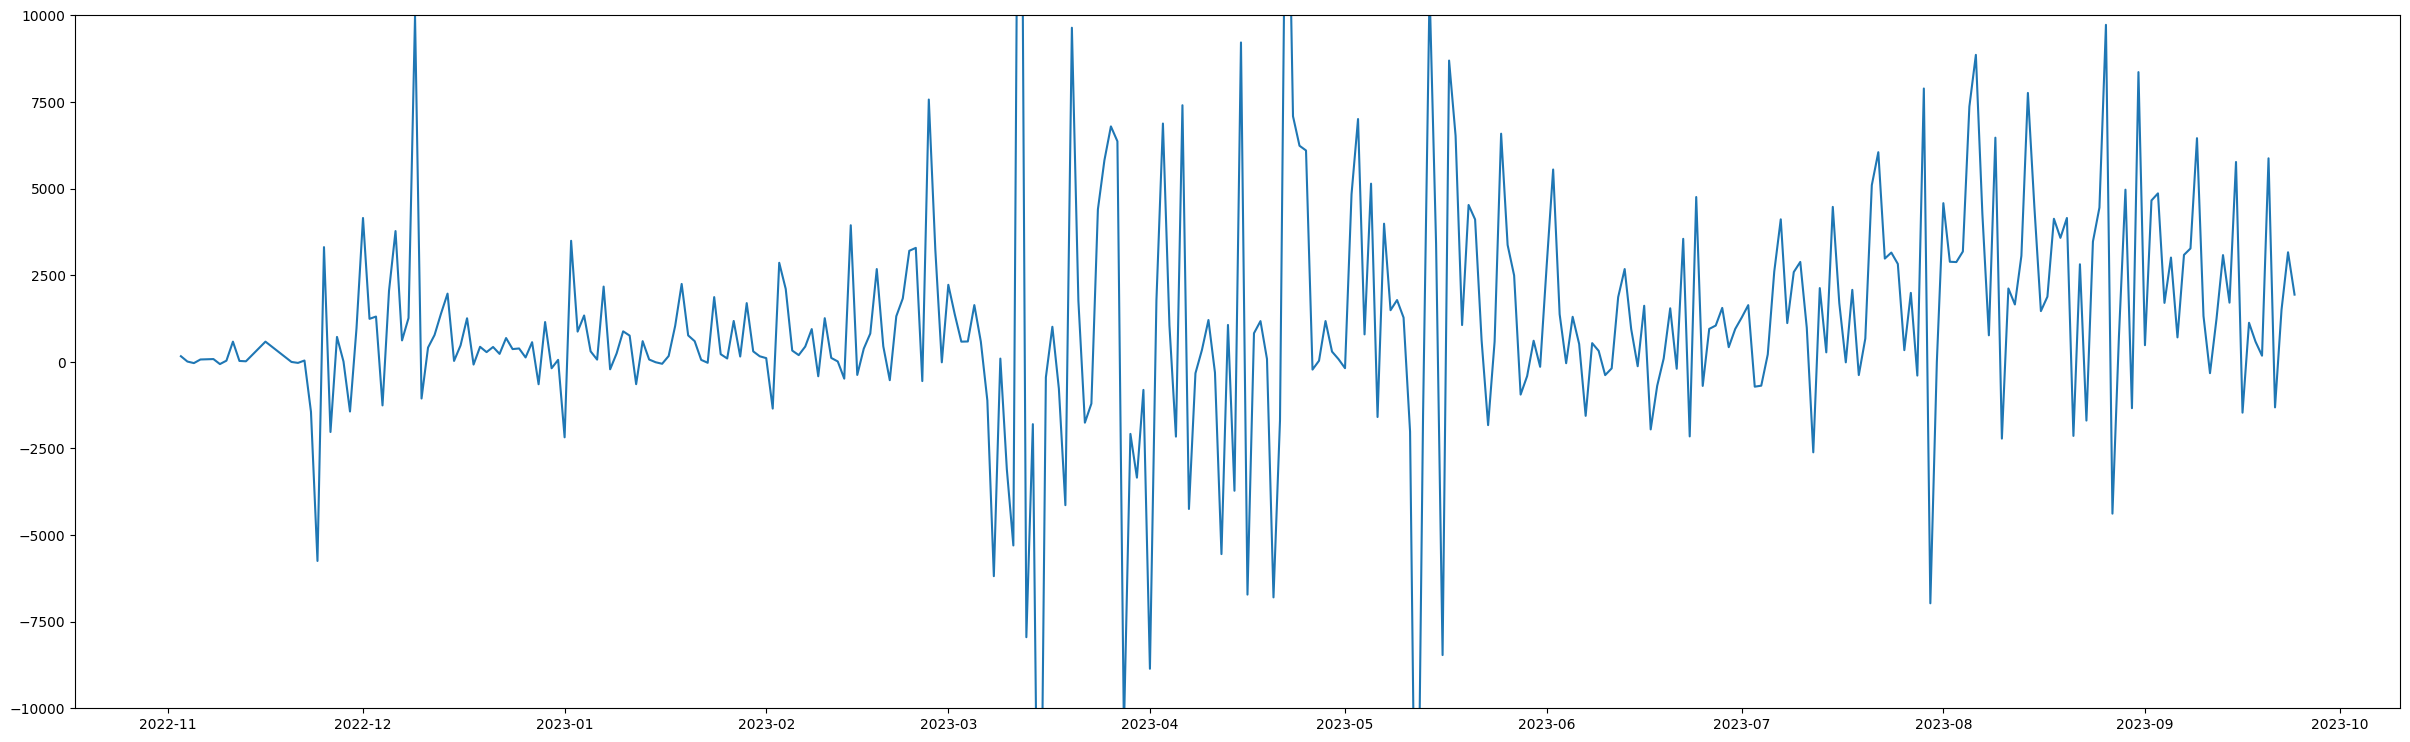

In [60]:
plt.figure(figsize=(30,9))
plt.plot(df.Periodo, df.net_revenue)
plt.ylim(-10000,10000)

In [ ]:
# df = df.set_index('Periodo')

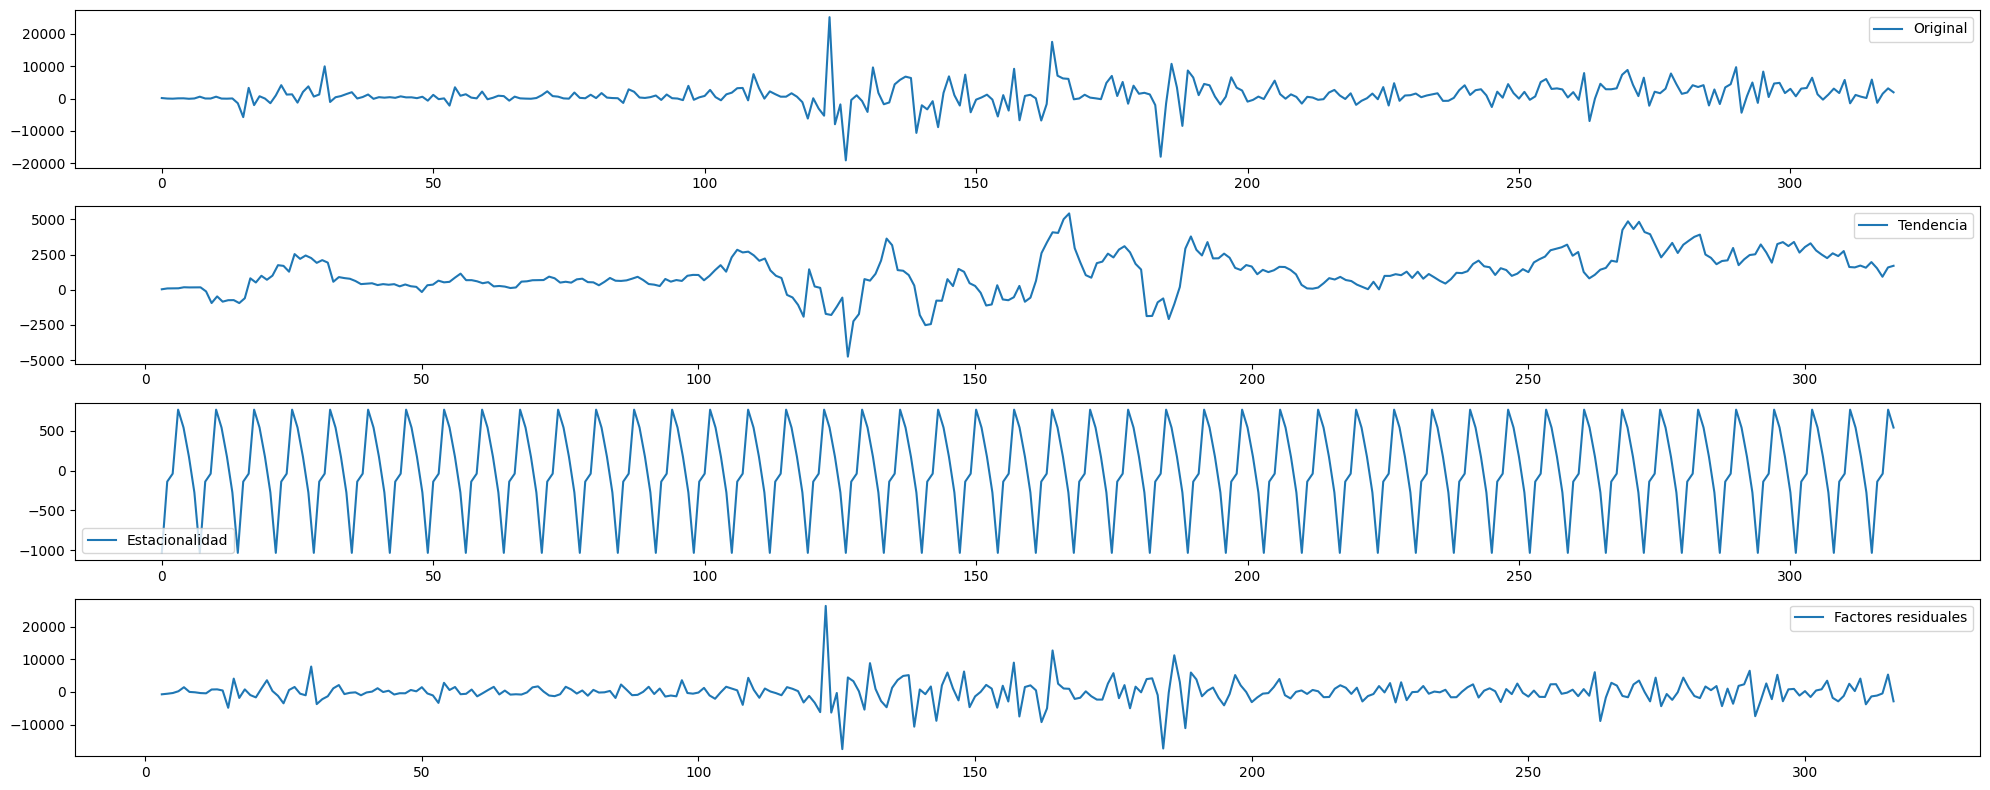

In [61]:
# Descomposición de los datos para observar los componentes de la serie temporal, donde podemos observar una estacionalidad semanal.
decomposition = seasonal_decompose(df['net_revenue'], model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(df.index, df['net_revenue'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, residual, label='Factores residuales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [62]:
# Usamos una prueba de hipótesis para validar la diferenciación de los datos. Al rechazar la hipotesis nula, los datos son de tipo estacionario.

# Augmented Dickey-Fuller (ADF) test
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. Augmented Dickey-Fuller (ADF) Test: ", dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

adf_test(df['net_revenue'])

1. Augmented Dickey-Fuller (ADF) Test:  -17.955859289670975
2. P-Value :  2.8280584742752617e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 319
5. Critical Values :
	 1% :  -3.4510167751522642
	 5% :  -2.87064334231426
	 10% :  -2.5716201744283174


In [ ]:
# Obtención de parametros para el modelo a partir del menor AIC: Ejecución de código demorado
# p_values = range(0, 3)
# d_values = range(0, 3)
# q_values = range(0, 3)
# P_values = range(0, 3)
# D_values = range(0, 3)
# Q_values = range(0, 3)
# s_values = range(7, 9)  # Seasonal period
# pdq = list(product(p_values, d_values, q_values))
# seasonal_pdq = list(product(P_values, D_values, Q_values, s_values))
# results = []
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model = SARIMAX(df['net_revenue'], order=param, seasonal_order=param_seasonal)
#             model_fit = model.fit()
#             aic = model_fit.aic
#             results.append((param, param_seasonal, aic))
#         except:
#             continue

# # Choose the SARIMA model with the lowest AIC value
# best_param, best_param_seasonal, best_aic = min(results, key=lambda x: x[2])
# print('\nBest SARIMA Parameters:')
# print('Non-Seasonal Order:', best_param)
# print('Seasonal Order:', best_param_seasonal)
# print('AIC:', best_aic)   

Best SARIMA Parameters:
Non-Seasonal Order: (1, 2, 0)
Seasonal Order: (2, 2, 1, 7)
AIC: 10.0

In [94]:
# Cracion de datos de train y test
train = df.iloc[0:280]
test = df.iloc[280:]
print(train.shape,test.shape)

(280, 10) (40, 10)


In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(train['net_revenue'],order=(1,1,0),seasonal_order=(2,2,1,7))
model_sarima = model_sarima.fit()

c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

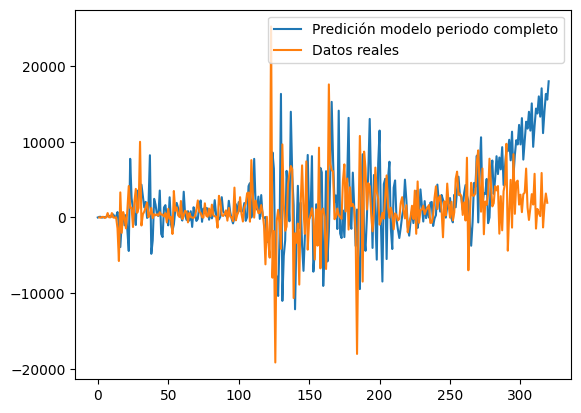

In [96]:
pred_periodo_completo = model_sarima.predict(start=0, end=320)
pred_periodo_completo.plot(legend=True, label='Predición modelo periodo completo')
df['net_revenue'].iloc[1:].plot(legend=True, label='Datos reales')

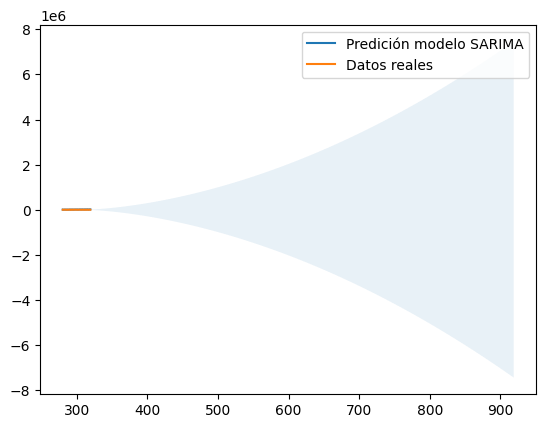

In [102]:
pred=model_sarima.predict(start=len(train),end=len(train)+len(test)-1).rename('Predición modelo SARIMA')
pred.plot(legend=True)
test['net_revenue'].plot(legend=True, label='Datos reales')
plt.fill_between(conf_intervals.index, conf_intervals['lower net_revenue'], conf_intervals['upper net_revenue'], alpha=0.1)

In [103]:
# Metricas de evaluación de modelo.
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Media:',test['net_revenue'].mean())
rmse=mean_squared_error(pred,test['net_revenue'])
print(f'RMSE: {rmse}')

Media: 2318.2491877674997
RMSE: 88549626.68952055


<AxesSubplot:>

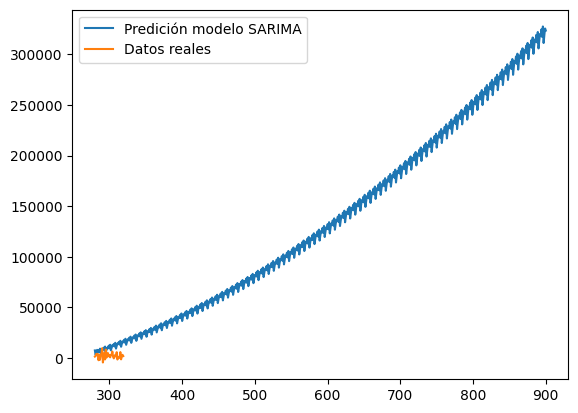

In [107]:
pred=model_sarima.predict(start=280,end=900).rename('Predición modelo SARIMA')
pred.plot(legend=True)
test['net_revenue'].plot(legend=True, label='Datos reales')
# plt.fill_between(conf_intervals.index, conf_intervals['lower net_revenue'], conf_intervals['upper net_revenue'], alpha=0.1)

In [110]:
df.to_csv('df_tratado.csv', index=False)

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model_sarima = SARIMAX(intento['net_revenue'],order=(1,1,0),seasonal_order=(2,2,1,7))
# model_sarima = model_sarima.fit()

# intento['forecast']=model_sarima.predict(start = 100, end = 320)
# intento[['net_revenue','forecast']].plot(figsize=(15,8))
# plt.title('Modelo SARIMA para predicción de ventas netas', fontsize = 15)
# plt.show()